In [27]:
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('/home/matt/readout/host/')
import ali_offline_demod as dm
import imp
imp.reload(dm)
import pickle 
from tqdm.notebook import tqdm
import glob
from scipy.signal import find_peaks, savgol_filter

In [33]:
iv_curves = {#'4250MHz_BL9_Warm':'toneinit_fcenter_4250.0_20240212164634_t_20240212172504'#,
             #'4250MHz_BL10_Warm':'toneinit_fcenter_4250.0_20240212164634_t_20240212171247',
             #'4250MHz_BL11_Warm':'toneinit_fcenter_4250.0_20240212164634_t_20240212173240',
             #'4750MHz_BL7_Warm':'toneinit_fcenter_4750.0_20240212174427_t_20240212174816',
             #'4750MHz_BL8_Warm':'toneinit_fcenter_4750.0_20240212174427_t_20240212175959',
             #'4750MHz_BL9_Warm':'toneinit_fcenter_4750.0_20240212174427_t_20240212180717',
             #'4750MHz_BL11_Warm':'toneinit_fcenter_4750.0_20240212174427_t_20240212181437',
             #'5250MHz_BL7_Warm':'toneinit_fcenter_5250.0_20240212182224_t_20240212182634'#, -> problem here undiagnosed
             #'5250MHz_BL9_Warm':'toneinit_fcenter_5250.0_20240212182224_t_20240212183347', -> problem here
             #'5250MHz_BL12_Warm':'toneinit_fcenter_5250.0_20240212182224_t_20240212184128',
             #'5750MHz_BL8_Warm':'toneinit_fcenter_5750.0_20240212190328_t_20240212190721',
             '5750MHz_BL11_Warm':'toneinit_fcenter_5750.0_20240212190328_t_20240212191433',
             #'6250MHz_BL8_Warm':'toneinit_fcenter_6250.0_20240212192226_t_20240212192618',
             #'6750MHz_BL12_Warm':'toneinit_fcenter_6750.0_20240212193336_t_20240212193745',
             #'4250MHz_BL9_Cold':'toneinit_fcenter_4250.0_20240213100705_t_20240213101047',
             #'4250MHz_BL10_Cold':'toneinit_fcenter_4250.0_20240213100705_t_20240213101808',
             #'4250MHz_BL11_Cold':'toneinit_fcenter_4250.0_20240213100705_t_20240213102551',
             #'4750MHz_BL7_Cold':'toneinit_fcenter_4750.0_20240213103311_t_20240213103650',
             #'4750MHz_BL8_Cold':'toneinit_fcenter_4750.0_20240213103311_t_20240213104400',
             #'4750MHz_BL9_Cold':'toneinit_fcenter_4750.0_20240213103311_t_20240213105157',
             #'4750MHz_BL11_Cold':'toneinit_fcenter_4750.0_20240213103311_t_20240213105928',
             #'5250MHz_BL7_Cold':'toneinit_fcenter_5250.0_20240213110651_t_20240213111049',
             #'5250MHz_BL9_Cold':'toneinit_fcenter_5250.0_20240213110651_t_20240213111823', -> problem here
             #'5250MHz_BL12_Cold':'toneinit_fcenter_5250.0_20240213110651_t_20240213112541',
             #'5750MHz_BL8_Cold':'toneinit_fcenter_5750.0_20240213114826_t_20240213115229',
             #'5750MHz_BL11_Cold':'toneinit_fcenter_5750.0_20240213114826_t_20240213120017',
             #'6250MHz_BL8_Cold':'toneinit_fcenter_6250.0_20240213120741_t_20240213121138',
             #'6750MHz_BL12_Cold':'toneinit_fcenter_6750.0_20240213121929_t_20240213123317'}
            }

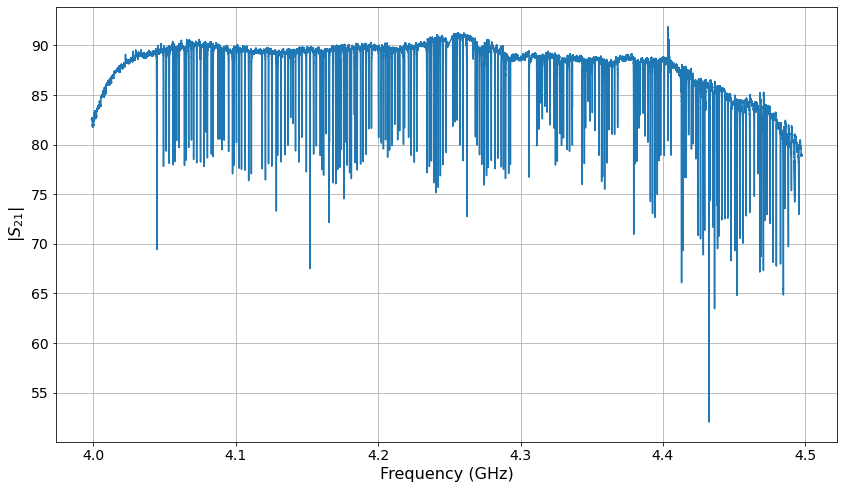

looking for delay region


/home/matt/readout/host/ali_offline_demod.py:604: RuntimeWarning: divide by zero encountered in log10
  targeted_lo_sweep_path = find_file(init_directory, 'lo_sweep_targeted_2')


start = 4047472656.2500253
stop = 4057492187.5000253
3.231446148393832


  0%|          | 0/235 [00:00<?, ?it/s]

(235, 187)


  0%|          | 0/235 [00:00<?, ?it/s]

(86,)
(86,)
(39,)
(39,)
0.007976108397460671
0.012196445593009031
(84,)
(84,)
(37,)
(37,)
0.007779124005574608
0.01179722738140044
(85,)
(85,)
(0,)
(0,)
0.00725
0.011904628561144891
(86,)
(86,)
(40,)
(40,)
0.007568917859548135
0.011378638475097583
(86,)
(86,)
(40,)
(40,)
0.007549597989276713
0.01131513980927799
(85,)
(85,)
(40,)
(40,)
0.007582697547576927
0.011341205166755547
(85,)
(85,)
(42,)
(42,)
0.007866806372623865
0.011921370561840118
(85,)
(85,)
(39,)
(39,)
0.007710966468833474
0.011605224817422332
(85,)
(85,)
(39,)
(39,)
0.007579743034960254
0.01140306212431351
(95,)
(95,)
(0,)
(0,)
0.00725
0.011673738628215611
(86,)
(86,)
(36,)
(36,)
0.007517938994102366
0.011254177199676675
(87,)
(87,)
(0,)
(0,)
0.00725
0.011607372797274182
(90,)
(90,)
(0,)
(0,)
0.00725
0.013355886294212735
(85,)
(85,)
(42,)
(42,)
0.00784494470525298
0.012017508306500186
(90,)
(90,)
(35,)
(35,)
0.008090823377815784
0.012445103224264039
(87,)
(87,)
(37,)
(37,)
0.007547733534936453
0.011371926452704142
(86,)
(8

In [49]:
%matplotlib inline
result_iv_2 = dm.full_iv_process(iv_curves['4250MHz_BL9_Warm'],f_sawtooth=15, filter_Rn_Al=True, plot=None) 

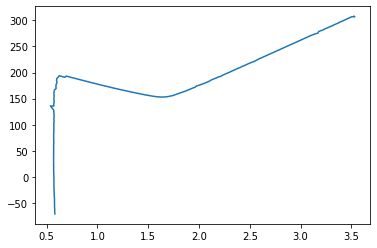

In [53]:
for ch in [229]:#range(len(result_iv['Vtes'])):
    plt.plot(result_iv_2['Vtes'][ch],result_iv_2['Ites'][ch])

In [324]:
%matplotlib qt
for ch in [229]:#range(len(result_iv['Vtes'])):
    plt.plot(result_iv['Pbias'][ch],result_iv['Rtes'][ch])
plt.ylim([0,0.015])

IndexError: index 229 is out of bounds for axis 0 with size 226

In [9]:
with open('test_dictionary.pkl', 'wb') as f:
    pickle.dump(result_iv, f)

In [24]:
with open('test_dictionary.pkl', 'rb') as f:
        x = pickle.load(f)

[1.70778752e+09 1.70778752e+09 1.70778752e+09 ... 1.70778793e+09
 1.70778793e+09 1.70778793e+09]


In [26]:
for i in iv_curves:
    print(f'{i} = {iv_curves[i]}')

4250MHz_BL9_Warm = toneinit_fcenter_4250.0_20240212164634_t_20240212172504
4250MHz_BL10_Warm = toneinit_fcenter_4250.0_20240212164634_t_20240212171247
4250MHz_BL11_Warm = toneinit_fcenter_4250.0_20240212164634_t_20240212173240
4750MHz_BL7_Warm = toneinit_fcenter_4750.0_20240212174427_t_20240212174816
4750MHz_BL8_Warm = toneinit_fcenter_4750.0_20240212174427_t_20240212175959
4750MHz_BL9_Warm = toneinit_fcenter_4750.0_20240212174427_t_20240212180717
4750MHz_BL11_Warm = toneinit_fcenter_4750.0_20240212174427_t_20240212181437
5250MHz_BL7_Warm = toneinit_fcenter_5250.0_20240212182224_t_20240212182634
5250MHz_BL9_Warm = toneinit_fcenter_5250.0_20240212182224_t_20240212183347
5250MHz_BL12_Warm = toneinit_fcenter_5250.0_20240212182224_t_20240212184128
5750MHz_BL8_Warm = toneinit_fcenter_5750.0_20240212190328_t_20240212190721
5750MHz_BL11_Warm = toneinit_fcenter_5750.0_20240212190328_t_20240212191433
6250MHz_BL8_Warm = toneinit_fcenter_6250.0_20240212192226_t_20240212192618
6750MHz_BL12_Warm = 

In [34]:
%matplotlib inline
for i in iv_curves:
    print(f'{i}:')
    result_iv = dm.full_iv_process(iv_curves[i],f_sawtooth=15, filter_Rn_Al=True, plot=None)
    with open(f'./20240213_processed_load_curve_data/testing/20240213_results_{i}.pkl', 'wb') as f:
        pickle.dump(result_iv, f)

5750MHz_BL11_Warm:
looking for delay region
start = 5687081976.5625925
stop = 5697101507.8125925
3.254047092594748


  0%|          | 0/196 [00:00<?, ?it/s]

  0%|          | 0/196 [00:00<?, ?it/s]

  0%|          | 0/196 [00:00<?, ?it/s]

In [26]:
print(type(result_iv['Ibias']))

<class 'numpy.ndarray'>


In [289]:
#result_demod = dm.full_demod_process('ts_toneinit_fcenter_4750.0_20240212174427_t_20240212181450.hd5',ts_path = '/home/matt/alicpt_data/IV_data/toneinit_fcenter_4750.0_20240212174427_t_20240212181437',f_sawtooth=15)
#result_demod = dm.full_demod_process('ts_toneinit_fcenter_4250.0_20240212164634_t_20240212172516.hd5',ts_path = '/home/matt/alicpt_data/IV_data/toneinit_fcenter_4250.0_20240212164634_t_20240212172504',f_sawtooth=15)

result_demod = dm.full_demod_process('ts_toneinit_fcenter_5250.0_20240212182224_t_20240212182644.hd5',ts_path = '/home/matt/alicpt_data/IV_data/toneinit_fcenter_5250.0_20240212182224_t_20240212182634',f_sawtooth=15)







looking for delay region


/home/matt/readout/host/ali_offline_demod.py:606: RuntimeWarning: divide by zero encountered in log10
  y=np.append(y,20*np.log10(np.abs(test_sweep[1,:])))


start = 5120499164.062501
stop = 5130519671.875001
3.211278332976138


  0%|          | 0/226 [00:00<?, ?it/s]

In [41]:
%matplotlib qt

for ch in range(result_iv['Ites'].shape[0]):
    plt.plot(result_iv['Vtes'][ch], result_iv['Ites'][ch],'-',alpha=0.3)
    
delta_t = np.median(np.diff(result_iv['time series data']['fr t']))

print(1/delta_t)
    

488.3343811852369


In [11]:
result_iv

{'Ibias': array([15.00030005, 15.00340015, 14.9218999 , 14.8431001 , 14.76130017,
        14.6795    , 14.59809998, 14.51569995, 14.43479993, 14.35330017,
        14.27440014, 14.19129993, 14.11309998, 14.0303999 , 13.94879993,
        13.86709986, 13.7862998 , 13.70440002, 13.62130005, 13.54420007,
        13.46180017, 13.3818999 , 13.29990002, 13.21840015, 13.13709998,
        13.056     , 12.9733999 , 12.896     , 12.81459998, 12.73130005,
        12.65290002, 12.5691001 , 12.4898999 , 12.40809998, 12.32629993,
        12.24730005, 12.16529993, 12.08530005, 12.003     , 11.9225    ,
        11.8421001 , 11.76000012, 11.679     , 11.6       , 11.51920032,
        11.43620007, 11.35569995, 11.2743999 , 11.193     , 11.11140002,
        11.03029993, 10.95340002, 10.87130017, 10.8093999 , 10.71960022,
        10.62570007, 10.5448999 , 10.46419995, 10.38180005, 10.30229993,
        10.22159992, 10.14159992, 10.059     ,  9.97959998,  9.89779993,
         9.81779999,  9.73479999,  9.65560

In [299]:
bias_currents_path = '/home/matt/alicpt_data/IV_data/toneinit_fcenter_5250.0_20240212182224_t_20240212182634/bias_data_20240212182646.txt'
bias_currents = np.loadtxt(bias_currents_path) 


start_idx = dm.find_nearest_idx(result_demod['fr t']-result_demod['fr t'][0], result_demod['t0'])
    
data_demods_bin = dm.get_mean_current(bias_currents,result_demod['demod t']+result_demod['fr t'][start_idx],result_demod['demod data'])

In [312]:
%matplotlib qt
for ch in [152,153]:#range(result_demod['demod data'].shape[0]):
    plt.plot(data_demods_bin[ch],alpha=0.1)
    smooth=savgol_filter(data_demods_bin[ch], data_demods_bin[ch].shape[0], 10)
    smooth=dm.detect_zero_and_fill(smooth)
    dd=np.diff(np.diff(smooth))
    ind_sc=np.nanargmin(dd)+2
    print(ind_sc)
    
    plt.plot(smooth,alpha=0.1)

2
187


In [278]:
plt.plot(result_demod['demod t'], result_demod['demod data'][152],alpha=0.5)

In [305]:
def IV_correction(resps):
    """
    This function smooth the IV curve and then find the normal and superconducting point
    it will then try to correct the jump caused by unwrapping large Ites changes with current Ibias resolution
    """ 
    #only getting Al TES normal point
    peaks_nb,_=find_peaks(0-resps,width=20)
    print(peaks_nb)
    smooth=savgol_filter(resps, resps.shape[0], 10)
    print(smooth)
    smooth=dm.detect_zero_and_fill(smooth)
    print(smooth)
    dd=np.diff(np.diff(smooth))
    ind_sc=np.argmin(dd)+2
    print(ind_sc)
    if len(peaks_nb)==0 or peaks_nb[0]<30:
        return np.zeros(resps.shape[0])
    peak_nb=peaks_nb[0]
    #here we know that before peaks_nb[0] and after ind_sc the Ites is monotonic 
    resps_nb=resps[2:int(peak_nb-10)]
    resps_sc=resps[int(ind_sc+10):-10]
    resps_cor=np.zeros(resps.shape[0])
    resps_cor_acc=np.zeros(resps.shape[0])
    for i in range(resps.shape[0]):
        if i>=2 and i<peak_nb-10 and resps[i]-resps[i-1]>0.5:
            resps_cor[i]=-9
        if i>= ind_sc+10 and i<resps.shape[0]-5 and resps[i]-resps[i-1]>0.5:
            resps_cor[i]=-9
    for i in range(resps.shape[0]):
        if i>0:
            resps_cor_acc[i]=np.sum(resps_cor[:i+1])
    resps_corr=resps+resps_cor_acc
    print(resps_corr)
    print(ind_sc)
    return resps_corr, ind_sc



for i in range(len(result_demod['demod data'])):
    print(i)
    
    peaks_nb,_= find_peaks(0-data_demods_bin[i],width=20)
    max_ites=np.max(data_demods_bin[i])
    min_ites=np.min(data_demods_bin[i])
    if len(peaks_nb)==0 or peaks_nb[0] < 20 or max_ites-min_ites<20: continue
    
    
    result_iv_corr, result_iv_sc = IV_correction(data_demods_bin[i])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
[73]
[  7.37539779   3.72315395   0.75642546  -1.63390605  -3.54392383
  -5.05785765  -6.24918363  -7.18164666  -7.91020946  -8.48193212
  -8.93678595  -9.30840524  -9.62478048  -9.90889625 -10.17931721
 -10.45072497 -10.73440912 -11.038715   -11.3694511  -11.73025848
 -12.12294494 -12.54778608 -13.00379564 -13.48896724 -14.00048953
 -14.53493678 -15.08843673 -15.65681737 -16.23573456 -16.82078176
 -17.40758367 -17.99187496 -18.56956562 -19.13679402 -19.68996903
 -20.22580213 -20.74133083 -21.23393401 -21.70134049 -22.14163139
 -22.5532372  -22.93493031 -23.28581364 -23.60530604 -23.89312497
 -24.14926713 -24.37398738 -24.56777649 -24.73133808 -24.86556513
 -24.97151638 -25.05039296 -25.10351536 -25.13230112 -25.13824343
 -25.12289061 -25.08782688 -25.03465432 -24.96497624 -24.88038192
 -24.78243287 -24.67265055 -24.55250568 -24.42340893 -24.2867032
 -24.14365733 -23.9954

ValueError: too many values to unpack (expected 2)

In [264]:
result_demod

{'fr t': array([1.70779049e+09, 1.70779049e+09, 1.70779049e+09, ...,
        1.70779090e+09, 1.70779090e+09, 1.70779090e+09]),
 'nphi': 3.2525898052906044,
 't0': 0.009964481989542584,
 'demod t': array([3.33333333e-02, 1.00000000e-01, 1.66666667e-01, ...,
        4.11566667e+02, 4.11633333e+02, 4.11700000e+02]),
 'demod data': array([[-0.21462256, -0.21511277, -0.20897181, ..., -0.14633419,
         -0.14612567, -0.1466688 ],
        [-0.04054181, -0.04597883, -0.04190898, ...,  0.0143576 ,
          0.00932157,  0.01391706],
        [ 0.01698937,  0.01254838,  0.01669277, ...,  0.07584326,
          0.07198704,  0.07535306],
        ...,
        [ 0.46993042,  0.46029634,  0.46835228, ...,  0.52127916,
          0.51021316,  0.51948932],
        [ 0.48377851,  0.47345354,  0.48226617, ...,  0.53409244,
          0.52401045,  0.53230675],
        [-0.12082422, -0.12406397, -0.12015762, ..., -0.06217193,
         -0.06728243, -0.06418482]]),
 'channel freqs': array([4.50068236e+09+0.j,

In [220]:
%matplotlib qt
fig, ax = plt.subplots(1)
fig_2, ax_2 = plt.subplots(1)
fig_3, ax_3 = plt.subplots(1)
fig_4, ax_4 = plt.subplots(1)
fig_5, ax_5 = plt.subplots(1)

with open('./20240213_processed_load_curve_data/testing/20240213_results_4750MHz_BL9_Warm.pkl', 'rb') as f:
    data = pickle.load(f)

for ch in range(len(data['Vtes'])):
    ax.plot(data['Pbias'][ch],data['Rtes'][ch])
    ax_2.plot(data['demod data']['demod t'],data['demod data']['demod data'][ch])
    ax_3.plot(data['Ibias'],data['binned data'][ch])
    ax_4.plot(data['Vtes'][ch],data['Ites'][ch])
    ax_5.plot(data['Ibias'],data['Ites'][ch])
    
ax.set_ylim([0,0.015])

(0.0, 0.015)

In [30]:
#ASU numbering
#south line
GHz150_lines = [11,12,8,7] 
GHz95_lines = [10,9] 

In [71]:
%matplotlib qt
file = './20240213_processed_load_curve_data/20240213_results_5250MHz_BL12_Warm.pkl'

"""
with open(file, 'rb') as f:
    data_i = pickle.load(f) 
"""    
fig, ax = plt.subplots(1)
fig_2, ax_2 = plt.subplots(1)
fig_3, ax_3 = plt.subplots(1)


for ch in range(len(data_i['Vtes'])):
    ax.plot(result_iv['Vtes'][ch], result_iv['Ites'][ch])


for ch in range(len(data_i['Vtes'])):
    ax_2.plot(result_iv['Ibias'],result_iv['binned data'][ch])

channel=220
for channel in range(len(data_i['Vtes'])):
    smooth=savgol_filter(result_iv['binned data'][channel], result_iv['binned data'][channel].shape[0], 10)
    dd=np.diff(np.diff(smooth))
    ind_sc,_=find_peaks(smooth,width=20,prominence=20)
    if len(ind_sc)==0: continue
    ax_3.plot(result_iv['Ibias'],smooth,'r',alpha=0.2)
    ax_3.plot(result_iv['Ibias'],result_iv['binned data'][channel],'b',alpha=0.2)
    ax_3.vlines(result_iv['Ibias'][ind_sc[0]], 80,180, alpha=0.2)

./20240213_processed_load_curve_data/20240213_results_4750MHz_BL8_Warm.pkl
Warm 8
./20240213_processed_load_curve_data/20240213_results_4250MHz_BL11_Cold.pkl
Cold 11
./20240213_processed_load_curve_data/20240213_results_4250MHz_BL10_Cold.pkl
Cold 10
./20240213_processed_load_curve_data/20240213_results_4750MHz_BL7_Cold.pkl
Cold 7
./20240213_processed_load_curve_data/20240213_results_6750MHz_BL12_Warm.pkl
Warm 12
./20240213_processed_load_curve_data/20240213_results_4750MHz_BL7_Warm.pkl
Warm 7
./20240213_processed_load_curve_data/20240213_results_5750MHz_BL8_Warm.pkl
Warm 8
./20240213_processed_load_curve_data/20240213_results_6250MHz_BL8_Warm.pkl
Warm 8
./20240213_processed_load_curve_data/20240213_results_4250MHz_BL11_Warm.pkl
Warm 11
./20240213_processed_load_curve_data/20240213_results_6750MHz_BL12_Cold.pkl
Cold 12
./20240213_processed_load_curve_data/20240213_results_5750MHz_BL11_Cold.pkl
Cold 11
./20240213_processed_load_curve_data/20240213_results_4750MHz_BL9_Warm.pkl
Warm 9
./20

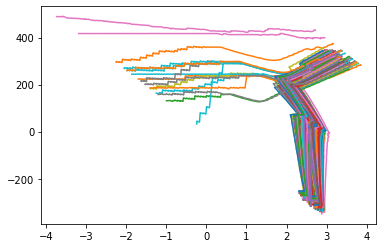

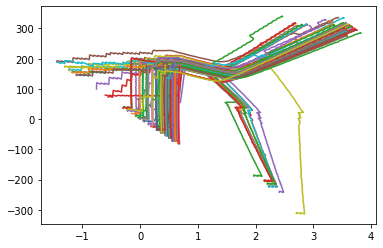

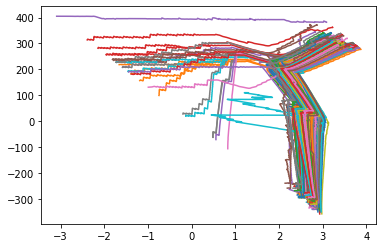

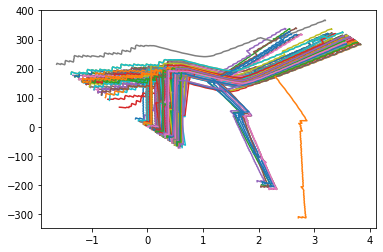

In [42]:
"""
if np.in1d([10], GHz150_lines)[0]:
    print('Result')
else:
    print('No result')
"""

datafiles = glob.glob('./20240213_processed_load_curve_data/*')
#print(datafiles)


fig_150_warm, ax_150_warm = plt.subplots(1)
fig_95_warm,  ax_95_warm  = plt.subplots(1)
fig_150_cold, ax_150_cold = plt.subplots(1)
fig_95_cold,  ax_95_cold  = plt.subplots(1)

for pickle_i in datafiles:
    print(pickle_i)
    temp = pickle_i.split('_')[-1].split('.')[0]
    ASU_BL = int(pickle_i.split('_')[-2].split('L')[1])
    
    print(temp, ASU_BL)
    
    with open(pickle_i, 'rb') as f:
        data_i = pickle.load(f) 
        
    #separate warm from cold
    if temp == 'Warm':
    
        if np.in1d(ASU_BL, GHz150_lines)[0]:
            for ch in range(len(data_i['Vtes'])):
                ax_150_warm.plot(data_i['Vtes'][ch],data_i['Ites'][ch])
        elif np.in1d(ASU_BL, GHz95_lines)[0]:
            for ch in range(len(data_i['Vtes'])):
                ax_95_warm.plot(data_i['Vtes'][ch],data_i['Ites'][ch])
        else:
            print('not triggered warm')
        
    elif temp == 'Cold':
    
        if np.in1d(ASU_BL, GHz150_lines)[0]:
            for ch in range(len(data_i['Vtes'])):
                ax_150_cold.plot(data_i['Vtes'][ch],data_i['Ites'][ch])
        elif np.in1d(ASU_BL, GHz95_lines)[0]:
            for ch in range(len(data_i['Vtes'])):
                ax_95_cold.plot(data_i['Vtes'][ch],data_i['Ites'][ch])
        else:
            print('not triggered cold')
            
    else:
        print('not triggered no temp')



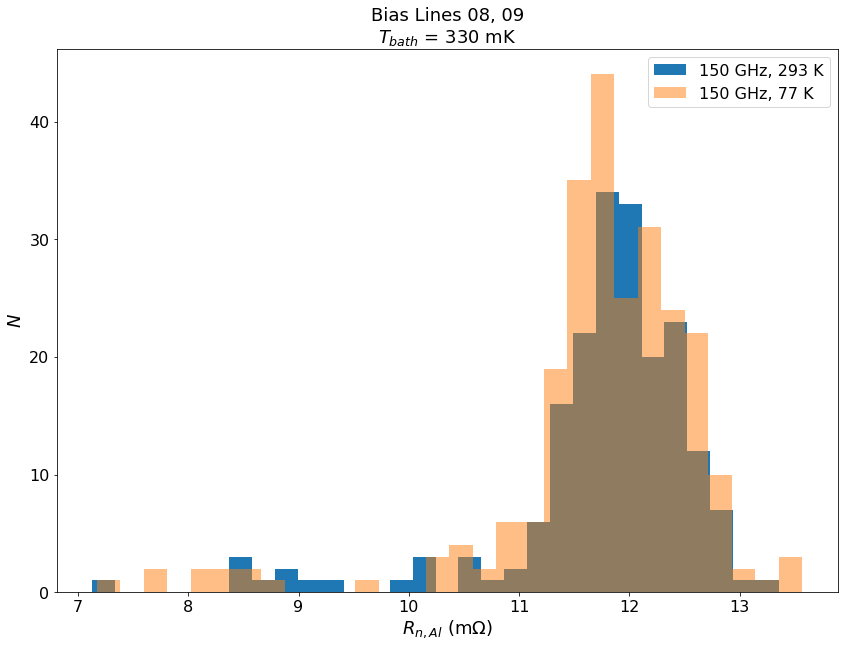

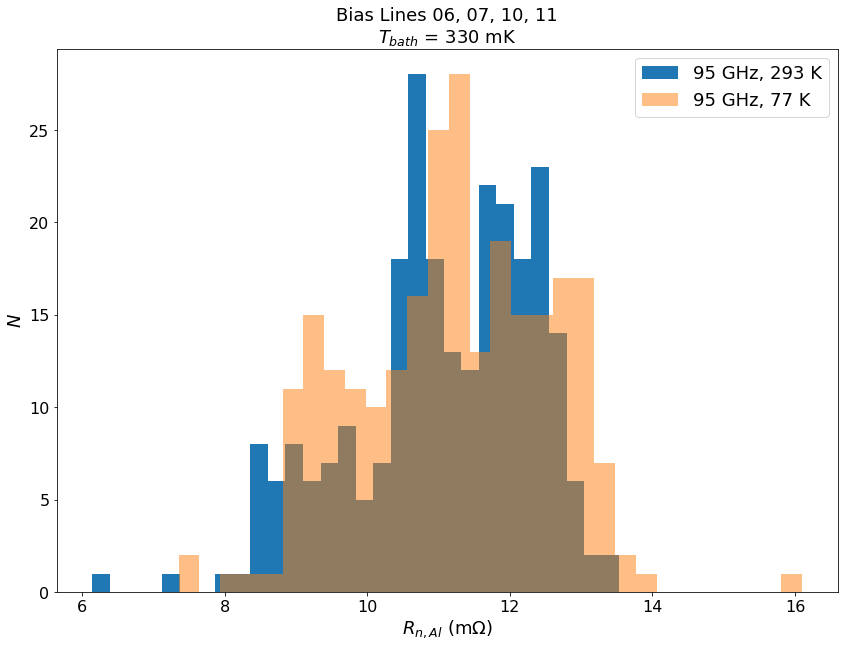

In [82]:
datafiles = glob.glob('./20240213_processed_load_curve_data/*')

GHz150_Warm_Rn = np.array([])
GHz150_Cold_Rn = np.array([])
GHz95_Warm_Rn = np.array([])
GHz95_Cold_Rn = np.array([])

for pickle_i in datafiles:
    temp = pickle_i.split('_')[-1].split('.')[0]
    ASU_BL = int(pickle_i.split('_')[-2].split('L')[1])
    
    #print(temp, ASU_BL)
    
    with open(pickle_i, 'rb') as f:
        data_i = pickle.load(f) 
        
    if temp == 'Warm':
        if np.in1d(ASU_BL, GHz150_lines)[0]:
            for ch in range(len(data_i['Vtes'])):
                GHz150_Warm_Rn = np.append(GHz150_Warm_Rn, data_i['Rn Al'][ch])
                                           
        if np.in1d(ASU_BL, GHz95_lines)[0]:
            for ch in range(len(data_i['Vtes'])):
                GHz95_Warm_Rn = np.append(GHz95_Warm_Rn, data_i['Rn Al'][ch])
     
    if temp == 'Cold':
        if np.in1d(ASU_BL, GHz150_lines)[0]:
            for ch in range(len(data_i['Vtes'])):
                GHz150_Cold_Rn = np.append(GHz150_Cold_Rn, data_i['Rn Al'][ch])
                                           
        if np.in1d(ASU_BL, GHz95_lines)[0]:
            for ch in range(len(data_i['Vtes'])):
                GHz95_Cold_Rn = np.append(GHz95_Cold_Rn, data_i['Rn Al'][ch])
                                          

fig_95_Rn, ax_95_Rn = plt.subplots(1, figsize=(14, 10))                    
                    
ax_95_Rn.hist(GHz95_Warm_Rn*1e3,30,label='150 GHz, 293 K')
ax_95_Rn.hist(GHz95_Cold_Rn*1e3,30,alpha=0.5,label='150 GHz, 77 K')

ax_95_Rn.set_xlabel('$R_{n,Al}$ (mΩ)',fontsize=18)
ax_95_Rn.set_ylabel('$N$',fontsize=18)
ax_95_Rn.set_title('Bias Lines 08, 09\n$T_{bath}$ = 330 mK',fontsize=18)
ax_95_Rn.legend(fontsize=16)
ax_95_Rn.tick_params(axis='both', which='major', labelsize=16)

fig_150_Rn, ax_150_Rn = plt.subplots(1, figsize=(14, 10))

ax_150_Rn.hist(GHz150_Warm_Rn*1e3,30,label='95 GHz, 293 K')
ax_150_Rn.hist(GHz150_Cold_Rn*1e3,30,alpha=0.5,label='95 GHz, 77 K')

ax_150_Rn.set_xlabel('$R_{n,Al}$ (mΩ)',fontsize=18)
ax_150_Rn.set_ylabel('$N$',fontsize=18)
ax_150_Rn.set_title('Bias Lines 06, 07, 10, 11\n$T_{bath}$ = 330 mK',fontsize=18)
ax_150_Rn.legend(fontsize=18)
ax_150_Rn.tick_params(axis='both', which='major', labelsize=16)
                

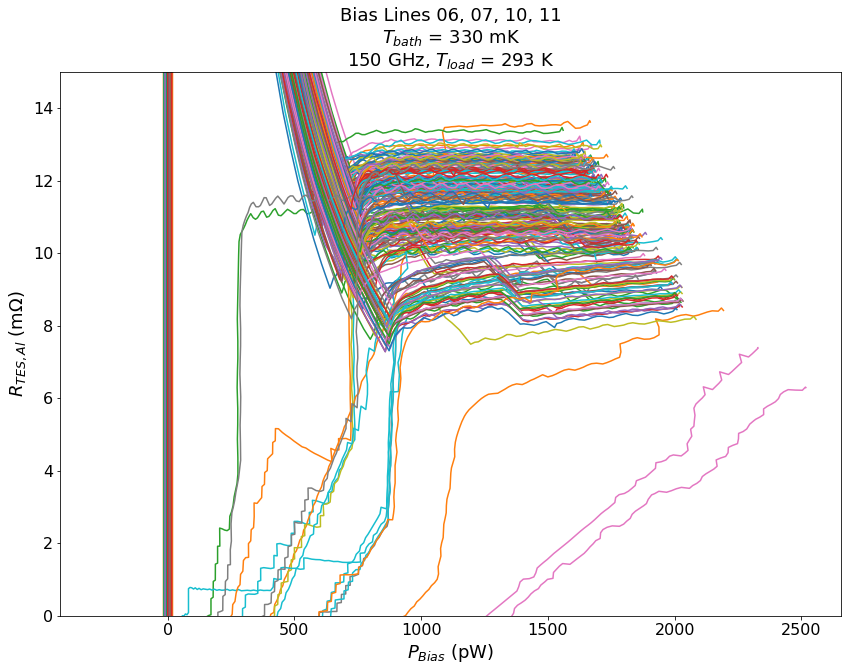

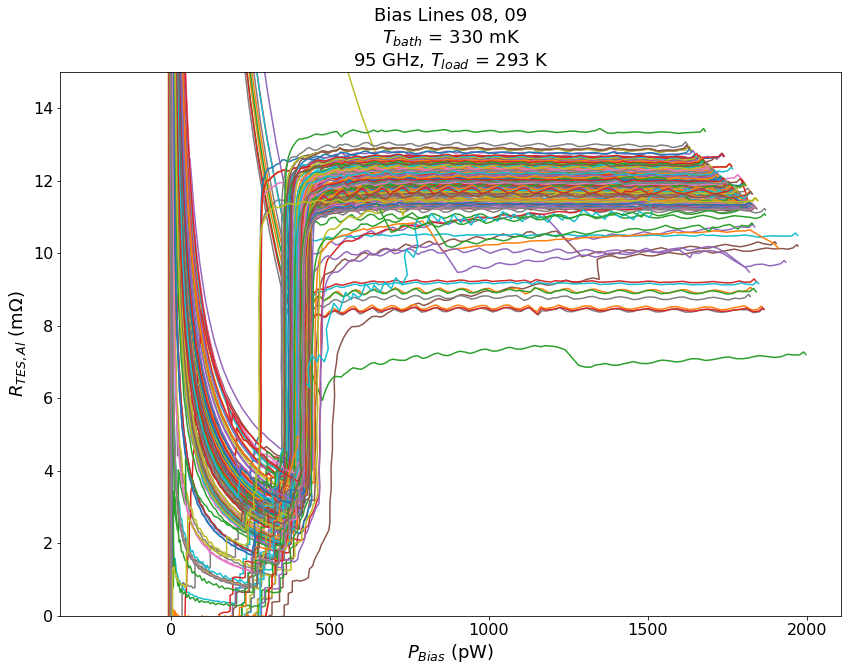

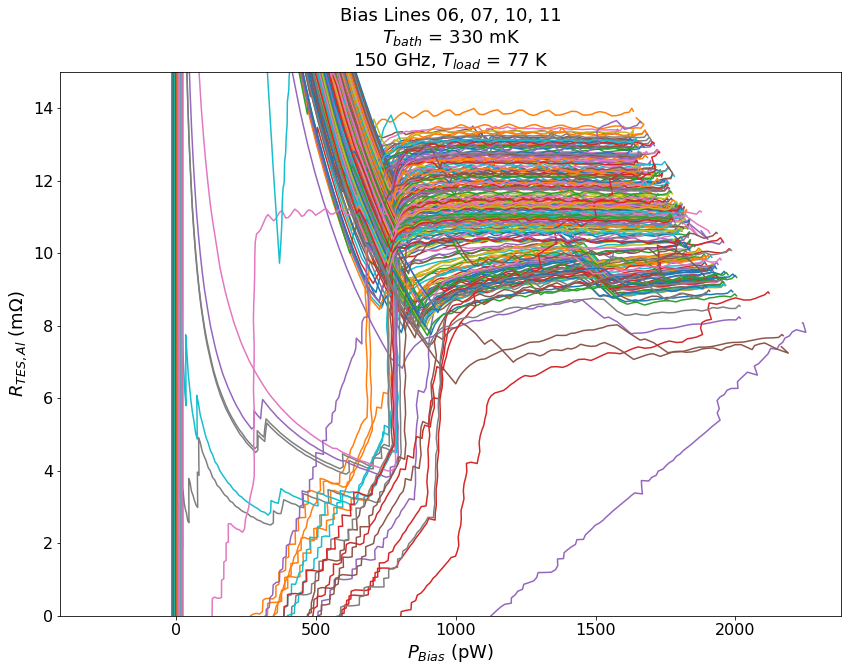

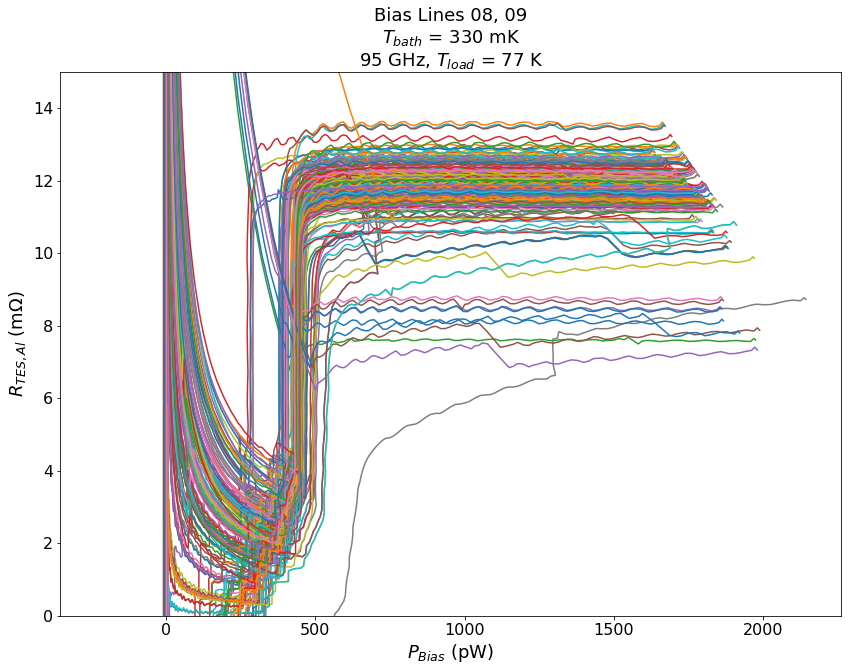

In [185]:
%matplotlib inline

datafiles = glob.glob('./20240213_processed_load_curve_data/*')
#print(datafiles)


fig_150_warm, ax_150_warm = plt.subplots(1,figsize=(14,10))
fig_95_warm,  ax_95_warm  = plt.subplots(1,figsize=(14,10))
fig_150_cold, ax_150_cold = plt.subplots(1,figsize=(14,10))
fig_95_cold,  ax_95_cold  = plt.subplots(1,figsize=(14,10))

for pickle_i in datafiles:
    #print(pickle_i)
    temp = pickle_i.split('_')[-1].split('.')[0]
    ASU_BL = int(pickle_i.split('_')[-2].split('L')[1])
    
    #print(temp, ASU_BL)
    
    with open(pickle_i, 'rb') as f:
        data_i = pickle.load(f) 
        
    #separate warm from cold
    if temp == 'Warm':
    
        if np.in1d(ASU_BL, GHz150_lines)[0]:
            for ch in range(len(data_i['Vtes'])):
                ax_150_warm.plot(data_i['Pbias'][ch],data_i['Rtes'][ch]*1e3)
        elif np.in1d(ASU_BL, GHz95_lines)[0]:
            for ch in range(len(data_i['Vtes'])):
                ax_95_warm.plot(data_i['Pbias'][ch],data_i['Rtes'][ch]*1e3)
        else:
            print('not triggered warm')
        
    elif temp == 'Cold':
    
        if np.in1d(ASU_BL, GHz150_lines)[0]:
            for ch in range(len(data_i['Vtes'])):
                ax_150_cold.plot(data_i['Pbias'][ch],data_i['Rtes'][ch]*1e3)
        elif np.in1d(ASU_BL, GHz95_lines)[0]:
            for ch in range(len(data_i['Vtes'])):
                ax_95_cold.plot(data_i['Pbias'][ch],data_i['Rtes'][ch]*1e3)
        else:
            print('not triggered cold')
            
    else:
        print('not triggered no temp')

ax_150_warm.set_xlabel('$P_{Bias}$ (pW)',fontsize=18)
ax_150_warm.set_ylabel('$R_{TES,Al}$ (mΩ)',fontsize=18)
ax_150_warm.set_title('Bias Lines 06, 07, 10, 11\n$T_{bath}$ = 330 mK\n150 GHz, $T_{load}$ = 293 K',fontsize=18)
ax_150_warm.set_ylim([0,0.015*1e3])
ax_150_warm.tick_params(axis='both', which='major', labelsize=16)

ax_95_warm.set_ylim([0,0.015*1e3])
ax_95_warm.set_xlabel('$P_{Bias}$ (pW)',fontsize=18)
ax_95_warm.set_ylabel('$R_{TES,Al}$ (mΩ)',fontsize=18)
ax_95_warm.set_title('Bias Lines 08, 09\n$T_{bath}$ = 330 mK\n95 GHz, $T_{load}$ = 293 K',fontsize=18)
ax_95_warm.set_ylim([0,0.015*1e3])
ax_95_warm.tick_params(axis='both', which='major', labelsize=16)

ax_150_cold.set_ylim([0,0.015*1e3])
ax_150_cold.set_xlabel('$P_{Bias}$ (pW)',fontsize=18)
ax_150_cold.set_ylabel('$R_{TES,Al}$ (mΩ)',fontsize=18)
ax_150_cold.set_title('Bias Lines 06, 07, 10, 11\n$T_{bath}$ = 330 mK\n150 GHz, $T_{load}$ = 77 K',fontsize=18)
ax_150_cold.set_ylim([0,0.015*1e3])
ax_150_cold.tick_params(axis='both', which='major', labelsize=16)

ax_95_cold.set_ylim([0,0.015*1e3])
ax_95_cold.set_xlabel('$P_{Bias}$ (pW)',fontsize=18)
ax_95_cold.set_ylabel('$R_{TES,Al}$ (mΩ)',fontsize=18)
ax_95_cold.set_title('Bias Lines 08, 09\n$T_{bath}$ = 330 mK\n95 GHz, $T_{load}$ = 77 K',fontsize=18)
ax_95_cold.set_ylim([0,0.015*1e3])
ax_95_cold.tick_params(axis='both', which='major', labelsize=16)


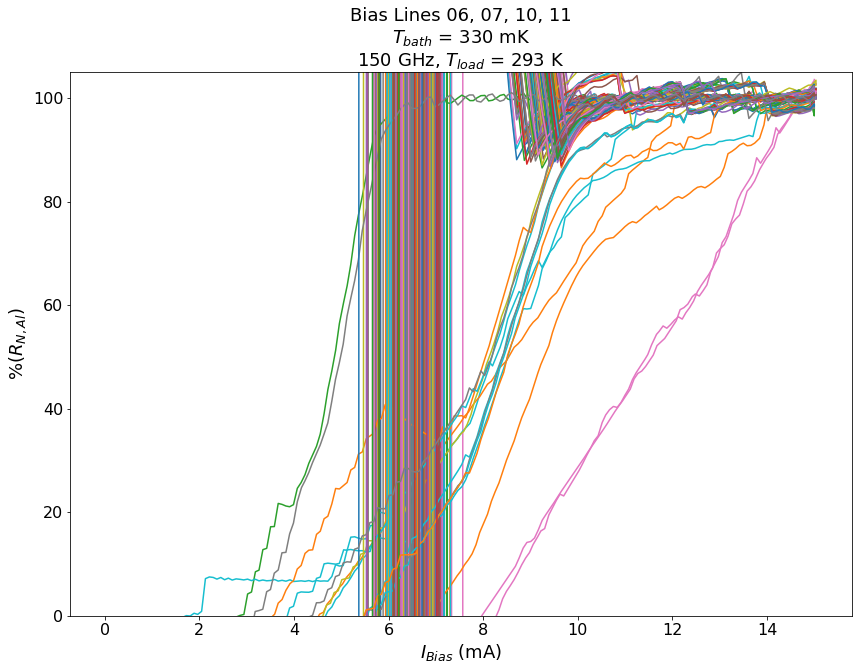

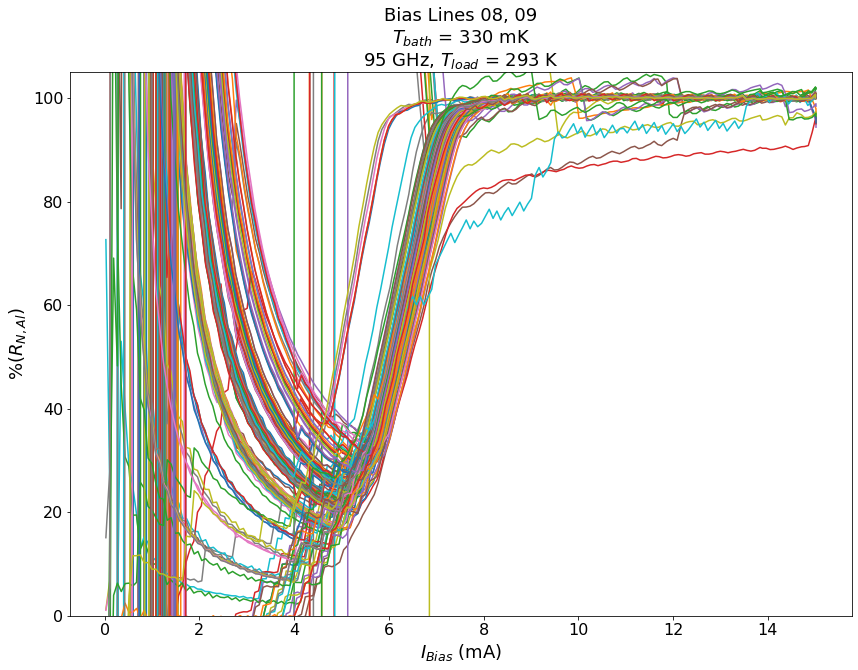

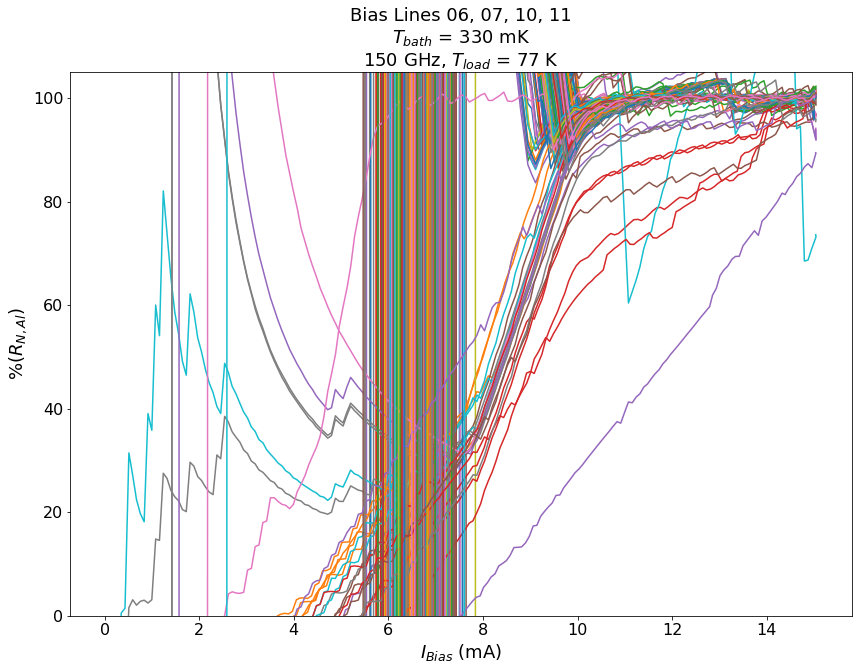

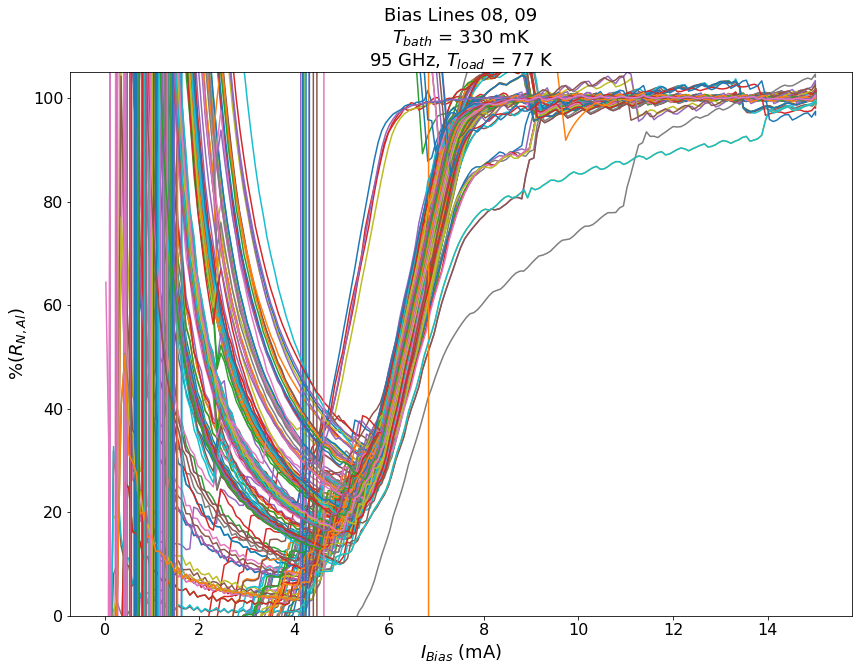

In [94]:
%matplotlib inline

datafiles = glob.glob('./20240213_processed_load_curve_data/*')
#print(datafiles)


fig_150_warm, ax_150_warm = plt.subplots(1,figsize=(14,10))
fig_95_warm,  ax_95_warm  = plt.subplots(1,figsize=(14,10))
fig_150_cold, ax_150_cold = plt.subplots(1,figsize=(14,10))
fig_95_cold,  ax_95_cold  = plt.subplots(1,figsize=(14,10))

for pickle_i in datafiles:
    #print(pickle_i)
    temp = pickle_i.split('_')[-1].split('.')[0]
    ASU_BL = int(pickle_i.split('_')[-2].split('L')[1])
    
    #print(temp, ASU_BL)
    
    with open(pickle_i, 'rb') as f:
        data_i = pickle.load(f) 
        
    #separate warm from cold
    if temp == 'Warm':
    
        if np.in1d(ASU_BL, GHz150_lines)[0]:
            for ch in range(len(data_i['Vtes'])):
                ax_150_warm.plot(data_i['Ibias'],data_i['bps'][ch]*100)
        elif np.in1d(ASU_BL, GHz95_lines)[0]:
            for ch in range(len(data_i['Vtes'])):
                ax_95_warm.plot(data_i['Ibias'],data_i['bps'][ch]*100)
        else:
            print('not triggered warm')
        
    elif temp == 'Cold':
    
        if np.in1d(ASU_BL, GHz150_lines)[0]:
            for ch in range(len(data_i['Vtes'])):
                ax_150_cold.plot(data_i['Ibias'],data_i['bps'][ch]*100)
        elif np.in1d(ASU_BL, GHz95_lines)[0]:
            for ch in range(len(data_i['Vtes'])):
                ax_95_cold.plot(data_i['Ibias'],data_i['bps'][ch]*100)
        else:
            print('not triggered cold')
            
    else:
        print('not triggered no temp')

ax_150_warm.set_xlabel('$I_{Bias}$ (mA)',fontsize=18)
ax_150_warm.set_ylabel('$\%(R_{N,Al})$',fontsize=18)
ax_150_warm.set_title('Bias Lines 06, 07, 10, 11\n$T_{bath}$ = 330 mK\n150 GHz, $T_{load}$ = 293 K',fontsize=18)
ax_150_warm.set_ylim([0,105])
ax_150_warm.tick_params(axis='both', which='major', labelsize=16)

ax_95_warm.set_ylim([0,0.015*1e3])
ax_95_warm.set_xlabel('$I_{Bias}$ (mA)',fontsize=18)
ax_95_warm.set_ylabel('$\%(R_{N,Al})$',fontsize=18)
ax_95_warm.set_title('Bias Lines 08, 09\n$T_{bath}$ = 330 mK\n95 GHz, $T_{load}$ = 293 K',fontsize=18)
ax_95_warm.set_ylim([0,105])
ax_95_warm.tick_params(axis='both', which='major', labelsize=16)

ax_150_cold.set_ylim([0,0.015*1e3])
ax_150_cold.set_xlabel('$I_{Bias}$ (mA)',fontsize=18)
ax_150_cold.set_ylabel('$\%(R_{N,Al})$',fontsize=18)
ax_150_cold.set_title('Bias Lines 06, 07, 10, 11\n$T_{bath}$ = 330 mK\n150 GHz, $T_{load}$ = 77 K',fontsize=18)
ax_150_cold.set_ylim([0,105])
ax_150_cold.tick_params(axis='both', which='major', labelsize=16)

ax_95_cold.set_ylim([0,0.015*1e3])
ax_95_cold.set_xlabel('$I_{Bias}$ (mA)',fontsize=18)
ax_95_cold.set_ylabel('$\%(R_{N,Al})$',fontsize=18)
ax_95_cold.set_title('Bias Lines 08, 09\n$T_{bath}$ = 330 mK\n95 GHz, $T_{load}$ = 77 K',fontsize=18)
ax_95_cold.set_ylim([0,105])
ax_95_cold.tick_params(axis='both', which='major', labelsize=16)

34
443.1392544911298


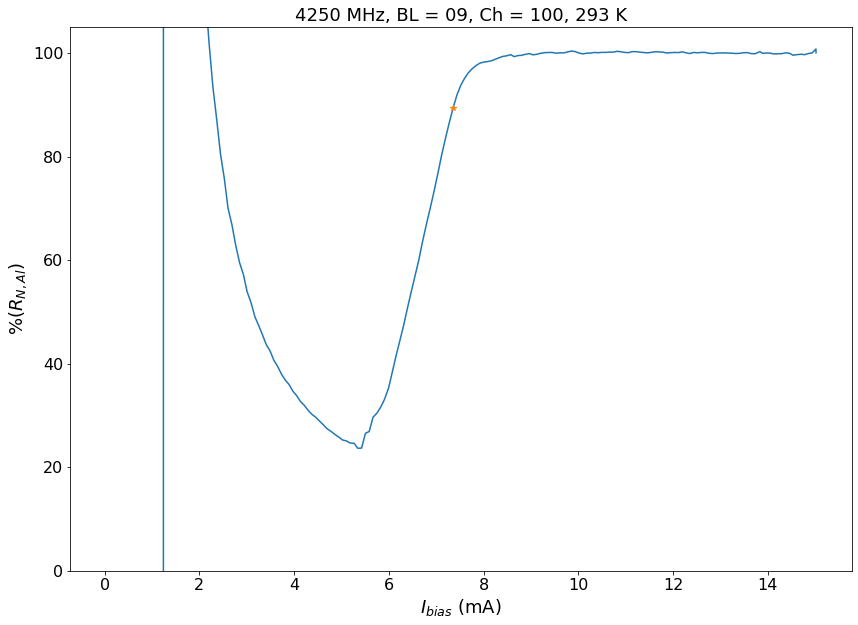

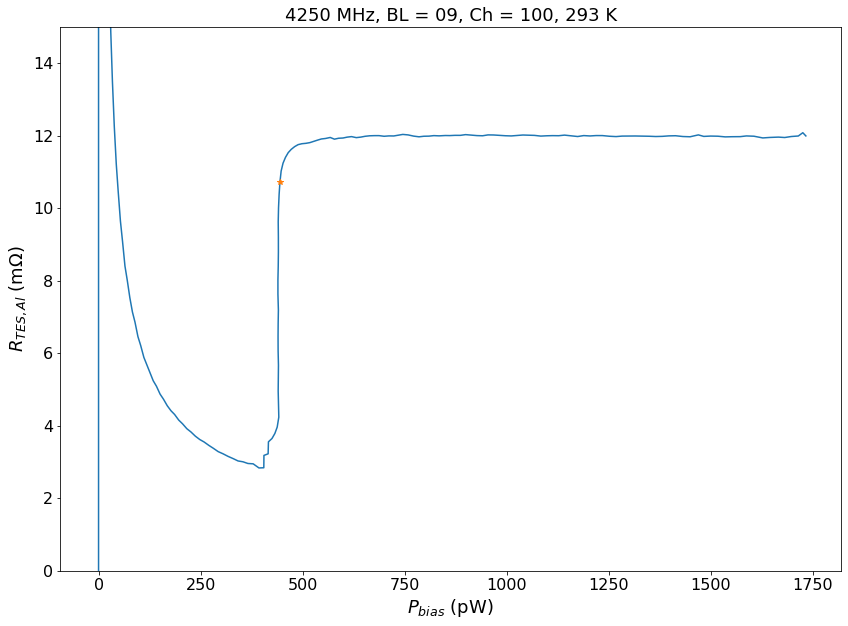

In [186]:
#finding Psat
#Pbias where Rtes is at 90% of Rn
%matplotlib inline

with open('./20240213_processed_load_curve_data/20240213_results_4250MHz_BL10_Warm.pkl', 'rb') as f:
        data_i = pickle.load(f)

ch=100    
split_pt = int(len(data_i['bps'][ch])/3)
Psat_index = dm.find_nearest_idx(data_i['bps'][ch][split_pt:]*100, 90)

fig_bps, ax_bps = plt.subplots(1,figsize=(14,10))

ax_bps.plot(data_i['Ibias'],data_i['bps'][ch]*100)
ax_bps.plot(data_i['Ibias'][split_pt+Psat_index],data_i['bps'][ch][split_pt+Psat_index]*100,'*')
ax_bps.set_ylim([0,105])
ax_bps.set_xlabel('$I_{bias}$ (mA)',fontsize=18)
ax_bps.set_ylabel('$\%(R_{N,Al}$)',fontsize=18)
ax_bps.tick_params(axis='both', which='major', labelsize=16)
ax_bps.set_title('4250 MHz, BL = 09, Ch = 100, 293 K',fontsize=18)

fig_Pbias, ax_Pbias = plt.subplots(1,figsize=(14,10))

ax_Pbias.plot(data_i['Pbias'][ch],data_i['Rtes'][ch]*1e3)
ax_Pbias.plot(data_i['Pbias'][ch][split_pt+Psat_index],data_i['Rtes'][ch][split_pt+Psat_index]*1e3,'*')
ax_Pbias.set_ylim([0,0.015*1e3])
ax_Pbias.set_xlabel('$P_{bias}$ (pW)',fontsize=18)
ax_Pbias.set_ylabel('$R_{TES,Al}$ (mΩ)',fontsize=18)
ax_Pbias.tick_params(axis='both', which='major', labelsize=16)
ax_Pbias.set_title('4250 MHz, BL = 09, Ch = 100, 293 K',fontsize=18)

print(Psat_index)
print(data_i['Pbias'][ch][split_pt+Psat_index])
    

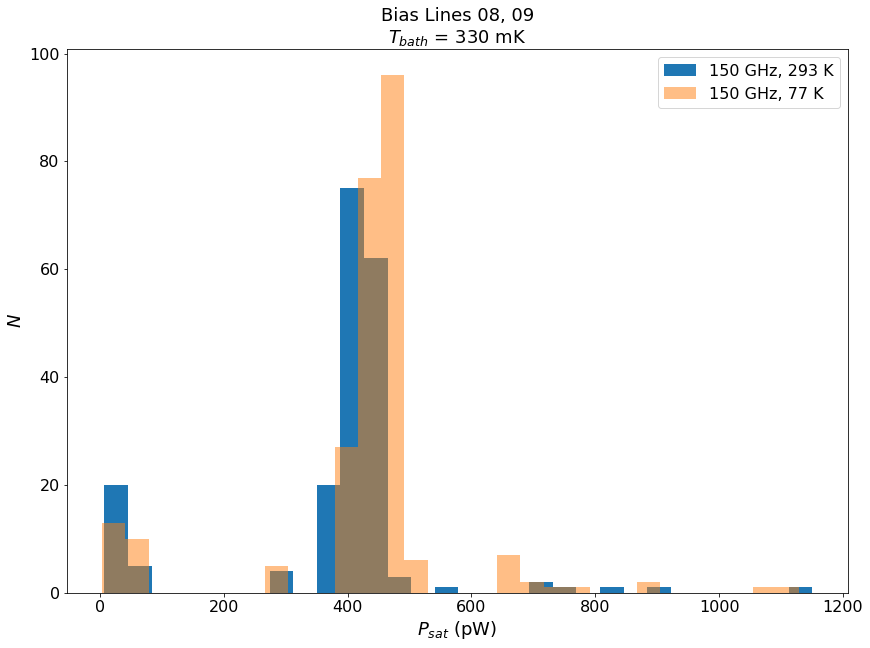

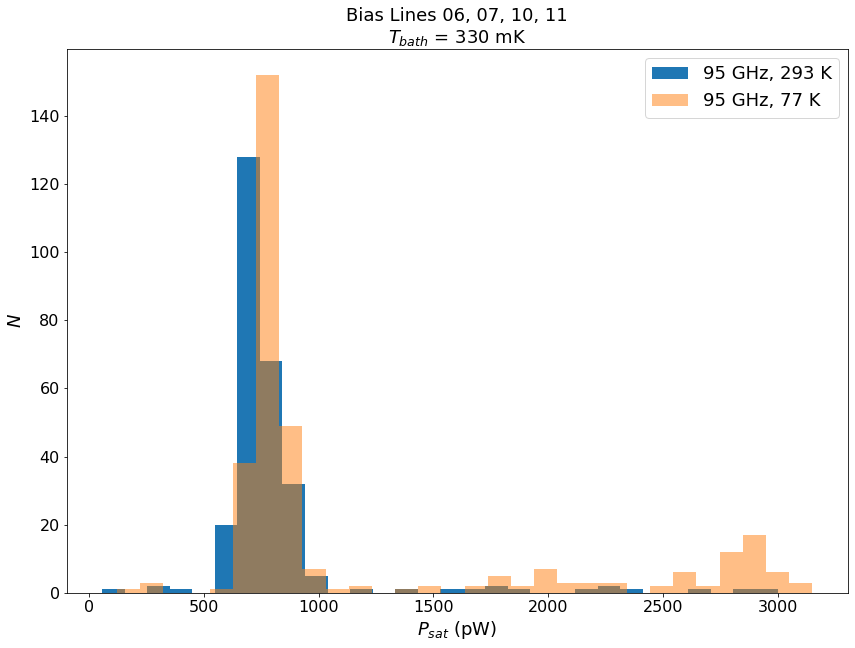

In [126]:
datafiles = glob.glob('./20240213_processed_load_curve_data/*')

GHz150_Warm_Psat = np.array([])
GHz150_Cold_Psat = np.array([])
GHz95_Warm_Psat = np.array([])
GHz95_Cold_Psat = np.array([])

for pickle_i in datafiles:
    temp = pickle_i.split('_')[-1].split('.')[0]
    ASU_BL = int(pickle_i.split('_')[-2].split('L')[1])
    
    #print(temp, ASU_BL)
    
    with open(pickle_i, 'rb') as f:
        data_i = pickle.load(f) 
        
    if temp == 'Warm':
        if np.in1d(ASU_BL, GHz150_lines)[0]:
            for ch in range(len(data_i['Vtes'])):
                split_pt = int(len(data_i['bps'][ch])/3)
                Psat_index = dm.find_nearest_idx(data_i['bps'][ch][split_pt:]*100, 90)
                GHz150_Warm_Psat = np.append(GHz150_Warm_Psat, data_i['Pbias'][ch][split_pt+Psat_index])
                                           
        if np.in1d(ASU_BL, GHz95_lines)[0]:
            for ch in range(len(data_i['Vtes'])):
                split_pt = int(len(data_i['bps'][ch])/3)
                Psat_index = dm.find_nearest_idx(data_i['bps'][ch][split_pt:]*100, 90)
                GHz95_Warm_Psat = np.append(GHz95_Warm_Psat, data_i['Pbias'][ch][split_pt+Psat_index])
     
    if temp == 'Cold':
        if np.in1d(ASU_BL, GHz150_lines)[0]:
            for ch in range(len(data_i['Vtes'])):
                split_pt = int(len(data_i['bps'][ch])/3)
                Psat_index = dm.find_nearest_idx(data_i['bps'][ch][split_pt:]*100, 90)
                GHz150_Cold_Psat = np.append(GHz150_Cold_Psat, data_i['Pbias'][ch][split_pt+Psat_index])
                                           
        if np.in1d(ASU_BL, GHz95_lines)[0]:
            for ch in range(len(data_i['Vtes'])):
                split_pt = int(len(data_i['bps'][ch])/3)
                Psat_index = dm.find_nearest_idx(data_i['bps'][ch][split_pt:]*100, 90)
                GHz95_Cold_Psat = np.append(GHz95_Cold_Psat, data_i['Pbias'][ch][split_pt+Psat_index])
                                          

fig_95_Psat, ax_95_Psat = plt.subplots(1, figsize=(14, 10))                    
                    
ax_95_Psat.hist(GHz95_Warm_Psat,30,label='150 GHz, 293 K')
ax_95_Psat.hist(GHz95_Cold_Psat,30,alpha=0.5,label='150 GHz, 77 K')

ax_95_Psat.set_xlabel('$P_{sat}$ (pW)',fontsize=18)
ax_95_Psat.set_ylabel('$N$',fontsize=18)
ax_95_Psat.set_title('Bias Lines 08, 09\n$T_{bath}$ = 330 mK',fontsize=18)
ax_95_Psat.legend(fontsize=16)
ax_95_Psat.tick_params(axis='both', which='major', labelsize=16)
ax_95_Psat.ticklabel_format(useOffset=False)
ax_95_Psat.ticklabel_format(style='plain')

fig_150_Psat, ax_150_Psat = plt.subplots(1, figsize=(14, 10))

ax_150_Psat.hist(GHz150_Warm_Psat,30,label='95 GHz, 293 K')
ax_150_Psat.hist(GHz150_Cold_Psat,30,alpha=0.5,label='95 GHz, 77 K')

ax_150_Psat.set_xlabel('$P_{sat}$ (pW)',fontsize=18)
ax_150_Psat.set_ylabel('$N$',fontsize=18)
ax_150_Psat.set_title('Bias Lines 06, 07, 10, 11\n$T_{bath}$ = 330 mK',fontsize=18)
ax_150_Psat.legend(fontsize=18)
ax_150_Psat.tick_params(axis='both', which='major', labelsize=16)
ax_150_Psat.ticklabel_format(useOffset=False)
ax_150_Psat.ticklabel_format(style='plain')


In [240]:
#differencing 50% Rn pt
#Pbias where Rtes is at 90% of Rn
%matplotlib qt
fig, ax = plt.subplots(1)
#fig_2, ax_2 = plt.subplots(1)

ch=119 

with open('./20240213_processed_load_curve_data/20240213_results_4250MHz_BL10_Warm.pkl', 'rb') as f:
        data_warm = pickle.load(f)

split_pt = int(len(data_i['bps'][ch])/3)
per50_index = dm.find_nearest_idx(data_warm['bps'][ch][split_pt:]*100, 50)
print(split_pt+per50_index)


ax.plot(data_warm['Vtes'][ch],data_warm['Ites'][ch],'.')
ax.plot(data_warm['Vtes'][ch][len(data_cold['Ites'][ch])-(split_pt+per50_index)],data_warm['Ites'][ch][len(data_cold['Ites'][ch])-(split_pt+per50_index)],'*')

with open('./20240213_processed_load_curve_data/20240213_results_4250MHz_BL10_Cold.pkl', 'rb') as f:
        data_cold = pickle.load(f)
           
split_pt = int(len(data_i['bps'][ch])/3)
per50_index = dm.find_nearest_idx(data_cold['bps'][ch][split_pt:]*100, 50)
print(split_pt+per50_index)

ax.plot(data_cold['Vtes'][ch],data_cold['Ites'][ch],'.',alpha=0.5)
ax.plot(data_cold['Vtes'][ch][len(data_cold['Ites'][ch])-(split_pt+per50_index)],data_cold['Ites'][ch][len(data_cold['Ites'][ch])-(split_pt+per50_index)],'*',alpha=0.5)

print(data_cold['Vtes'][ch])
print(data_warm['Vtes'][ch])

print(data_cold['Ites'][ch])
print(data_warm['Ites'][ch])


110
165
[3.54598999 3.55290229 3.522773   3.50560641 3.48628604 3.46716596
 3.44603767 3.42700444 3.40915991 3.39403519 3.37311204 3.35188432
 3.33345005 3.31382652 3.29674986 3.27910971 3.25804531 3.23772218
 3.21710724 3.19771158 3.18077661 3.15272226 3.14697403 3.12705608
 3.11403426 3.08680078 3.07225275 3.05071102 3.03291125 3.01087015
 2.9917958  2.97415627 2.95681214 2.9382173  2.91739723 2.89800646
 2.87762504 2.86125737 2.84310706 2.82337258 2.80316923 2.78241981
 2.76749354 2.74701659 2.72947948 2.71022816 2.68913302 2.66747046
 2.64990171 2.63314547 2.61576569 2.59463701 2.57412522 2.5523834
 2.53562174 2.51985078 2.50017629 2.47906649 2.45908081 2.4393486
 2.42190569 2.40607283 2.3862848  2.36453943 2.34461428 2.32463128
 2.30700061 2.29080118 2.27029792 2.25090377 2.22923203 2.2089451
 2.18992505 2.17310784 2.15210687 2.1359768  2.11497288 2.09360027
 2.07601776 2.05718952 2.03745456 2.01713426 1.994428   1.97819342
 1.95805667 1.93410368 1.91420391 1.89164787 1.86770722 1

In [47]:
result_iv['Ibias']

array([15.03049988, 15.03340002, 14.95260022, 14.87180005, 14.7921001 ,
       14.71130005, 14.63180005, 14.54899988, 14.4686001 , 14.388     ,
       14.31430005, 14.2246001 , 14.14570007, 14.06280005, 13.9815    ,
       13.90029993, 13.822     , 13.73809998, 13.65859998, 13.57719995,
       13.49559985, 13.41480005, 13.33630005, 13.25470007, 13.17560022,
       13.09330017, 13.009     , 12.93019995, 12.85729993, 12.77209997,
       12.691     , 12.61990015, 12.55090015, 12.44709998, 12.36609985,
       12.28519995, 12.20440002, 12.12690015, 12.04459998, 11.96180017,
       11.89670007, 11.80059998, 11.71999988, 11.63980005, 11.56040015,
       11.47950037, 11.39809985, 11.31709998, 11.24990002, 11.15569995,
       11.07509998, 10.9923999 , 10.914     , 10.83450012, 10.75130005,
       10.6728999 , 10.59170007, 10.51149988, 10.43040015, 10.34880005,
       10.26949988, 10.18879987, 10.10629999, 10.027     ,  9.94580005,
        9.86360004,  9.78420001,  9.70219995,  9.62470007,  9.54